In [3]:
import pandas as pd
import time
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("train", delimiter="\t")[:100] # Чтение тренировочной выборки

In [5]:
# Создание словаря из строки
def make_dict(string):
    try:
        array = string.split()
        cur_dict = {array[i]:array[i+1] for i in range(0, len(array) - 1, 2)}
    except:
        cur_dict = {}
    return cur_dict

In [6]:
# Создание финального отсортированного словаря из всех полей tokens 
def make_final_dict(field):
    iters = 0
    iters_i = 0
    big_dict = {}
    for i in range(len(field)):
        token_dict = make_dict(field[i])
        iters_i += 1
        for key, arg in token_dict.items():
            iters += 1
            if key in big_dict:
                big_dict[key] += int(arg)
                pass            
            else:
                big_dict[key] = 1
    sorted_big_dict = {}
    sorted_keys = sorted(big_dict, key=big_dict.get, reverse=True)

    for w in sorted_keys:
        sorted_big_dict[w] = big_dict[w]

    i = 0
    final_dict = {}
    for key, value in sorted_big_dict.items():
        if i == 1000:
            break
        i += 1
        final_dict[key] = value 
    return final_dict

In [7]:
# Заполнение объекта pandas данными
def fill_dataframe(df, field, final_dict):
    for i in range(len(field)): 
        for key, arg in final_dict.items():
            try:
                user_dict = make_dict(field[i])
                if key in user_dict:
                    df.loc[i, key] += np.float64(user_dict[key])
            except KeyError:
                pass
    return df

In [8]:
# Создание больших словарей для токенов и хешей
tokens_dict = make_final_dict(df.tokens)
hashes_dict = make_final_dict(df.urls_hashed)

In [9]:
# Создание объектов pandas с отдельным стобцом на каждый параметр (для каждого щапроса указана частота токена/хеша)
df_tokens = pd.DataFrame(np.zeros((len(df.tokens), len(list(tokens_dict.keys())))), columns=list(tokens_dict.keys()))
df_hashes = pd.DataFrame(np.zeros((len(df.tokens), len(list(hashes_dict.keys())))), columns=list(hashes_dict.keys()))
df = pd.concat([df, df_tokens, df_hashes], axis="columns")

In [10]:
# Заполнение пустых dataframes частотой встречи токенов/хешей 
df = fill_dataframe(df, df.tokens, tokens_dict)
df = fill_dataframe(df, df.urls_hashed, hashes_dict)

In [11]:
# Итоговый вид dataframe
df

,CLIENT_ID,RETRO_DT,tokens,DEF,urls_hashed,займы,купить,займ,новости,кабинет,...,97956f4cb7d0f8e10b2d7ad95fcc9c60,b8541b3532c893aa00136e5b0ab9df1b,cc711b101e3ee0834e8228d3ae296557,89f6701db4ede38d8e1145496684262d,b54feaa1f18b38c63572891dd98c4cd7,d3b0ef365d6ab2a18107a287589dcc10,6006c3c55ea7a18481ab7873cf0b9c06,98b3c5ed14ac0597744ea2d09d77d4cf,d49f962727e31ddfade0080521594f97,b65a2572c4228662849f64e7f340ae30
0,5909886,20200911,форм 1 мачеха 1 работы 1 пасынка 1 горячую 1 м...,0,7bbcc146c0ba4df814701ff7297b2205 1 ee0d49cbc99...,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1385448,20210519,platiza 1 мобильные 2 sergej 1 code 3 отказов ...,1,1889e0cbd3e343e9521a07aa312257ac 2 8253d8d3a67...,49.0,11.0,38.0,3.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1866195,20210913,sims 3 кредит 1 языке 1 разлива 1 огромное 1 о...,0,6e617b4bfdbef85d8b09ec08ac72f0f2 1 94309f5f116...,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1587081,20210702,code 1 историй 1 scf 1 шаг 1 деньги 3 серый 1 ...,0,1e833434273e04ba76cfcfb4b48ad21b 3 aee71c8d18d...,18.0,13.0,22.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1400908,20210522,отказов 2 tovara 1 сергея 1 купальный 1 чёрный...,0,83e85bee0d81c0e9e5047e202cddf534 3 6e617b4bfdb...,28.0,22.0,25.0,4.0,30.0,...,4.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,223384491,20211202,zdorovye 1 smartfony 1 бочонок 1 eda 1 купить ...,1,c97e78b6f2ddee56cafa6eb015d8254f 2 69adb4ce9c4...,0.0,4.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,216124231,20210622,dad 1 денежные 1 тенге 1 почта 5 confirm 1 sig...,0,7405aaece8dbd9b744b0752a7ecae526 5 7d3e979038b...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1711447,20210802,задачи 24 календарь 23 landing 5,1,6bfc846093307cc7bb8daaf05f9dc390 24 c36f3963f2...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,1714458,20210803,денег 1 истории 1 займы 2 нелюбимая 1 vino 1 d...,1,0e0beb620d7890844d5a7a98819b3888 1 7405aaece8d...,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Разбиваем на зависимые и независимые параметры
X = df.drop(["urls_hashed", "tokens", "DEF", "CLIENT_ID", "RETRO_DT"], axis="columns")
Y = df["DEF"]

In [13]:
# Разбиваем на тестовую и тренировочную выборку
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
# Первая модель - логическая регрессия
model1 = LogisticRegression(solver = "newton-cg", multi_class="auto")

In [15]:
# Вторая модель - случайный лес
model2 = RandomForestClassifier(n_estimators=50)

In [16]:
# Третья модель - метод опорных векторов
model3 = SVC()
#model3.fit(x_train, y_train)
#print(model2.score(x_test, y_test))

In [17]:
# Кросс-валидация - выбор лучшей модели
from sklearn.model_selection import cross_val_score
print("Linear Regression Model:\n {}".format(cross_val_score(model1, X, Y, cv=10)))
print("Random Forest Model:\n {}".format(cross_val_score(model2, X, Y, cv=10)))
print("SVC Model:\n {}".format(cross_val_score(model3, X, Y, cv=10)))

Linear Regression Model:
 [0.7 0.7 0.6 0.5 0.8 0.8 0.7 0.6 0.7 0.6]
Random Forest Model:
 [0.8 0.8 0.9 0.8 0.9 0.8 0.8 0.7 0.8 0.7]
SVC Model:
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.7 0.7]


In [18]:
# Сохранение моделей для последующего использования на выборке test
'''
import joblib
joblib.dump(model1, "model1")
joblib.dump(model2, "model2")
joblib.dump(model3, "model3")
'''

'\nimport joblib\njoblib.dump(model1, "model1")\njoblib.dump(model2, "model2")\njoblib.dump(model3, "model3")\n'

In [19]:
# Прример объясняемости модели
model1.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

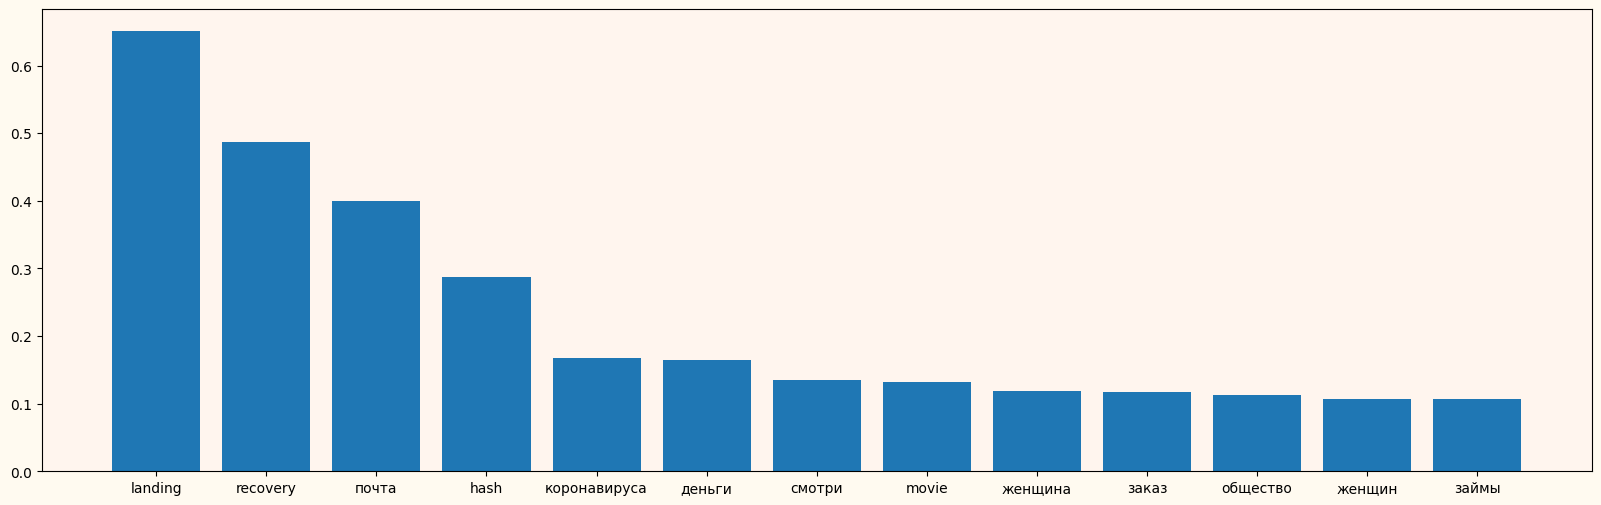

In [20]:
# Токены/хеши с самым большим влиянием
dicts = {model1.feature_names_in_[i]: model1.coef_[0][i] for i in range(len(model1.feature_names_in_))}
sorted_dicts = {}
sorted_keys = sorted(dicts, key=dicts.get, reverse=True)
for w in sorted_keys:
    sorted_dicts[w] = dicts[w]
final_dict = {}
i = 0
for key, value in sorted_dicts.items():
    if i == 18:
        break
    i += 1
    final_dict[key] = value 

x = []
for k in final_dict.keys():
    if len(k) > 14:
        x.append("hash") # Если попался хеш - не будем выводить его название
    else:
        x.append(k)
y = final_dict.values()

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.show()

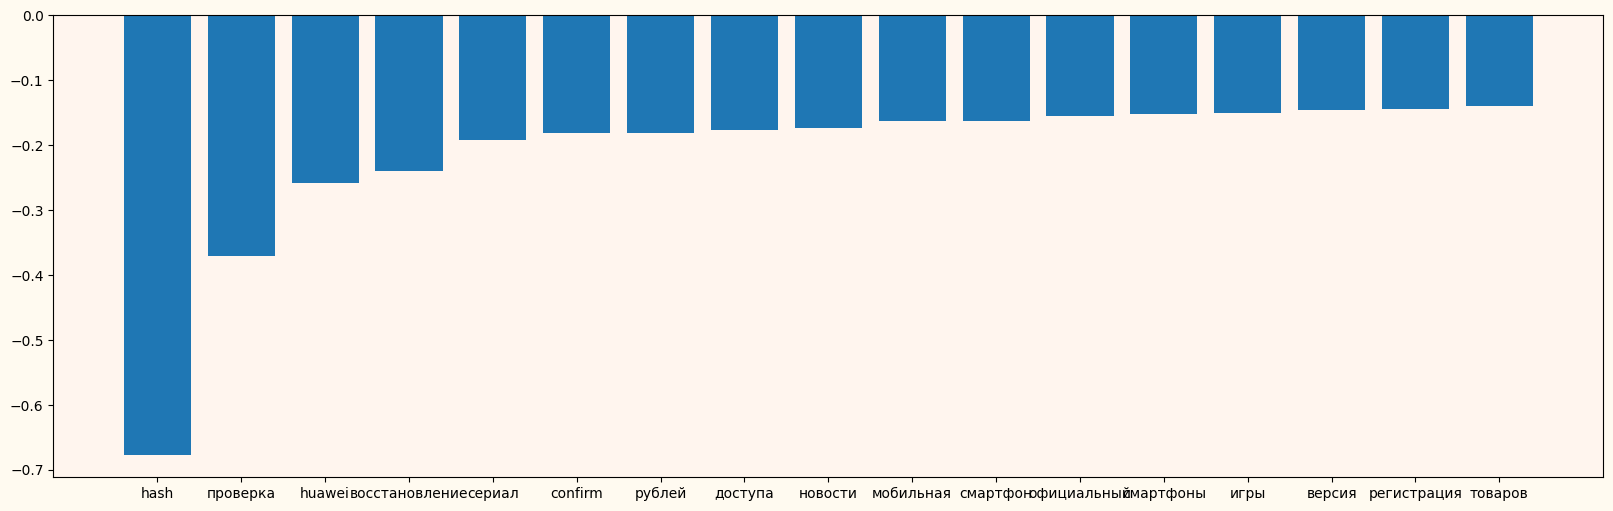

In [21]:
# Токены/хеши с самым большим отрицательным влиянием
sorted_dicts = {}
sorted_keys = sorted(dicts, key=dicts.get, reverse=False)
for w in sorted_keys:
    sorted_dicts[w] = dicts[w]
final_dict = {}
i = 0
for key, value in sorted_dicts.items():
    if i == 18:
        break
    i += 1
    final_dict[key] = value 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = []
for k in final_dict.keys():
    if len(k) > 14:
        x.append("hash")
    else:
        x.append(k)
y = final_dict.values()

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.show()

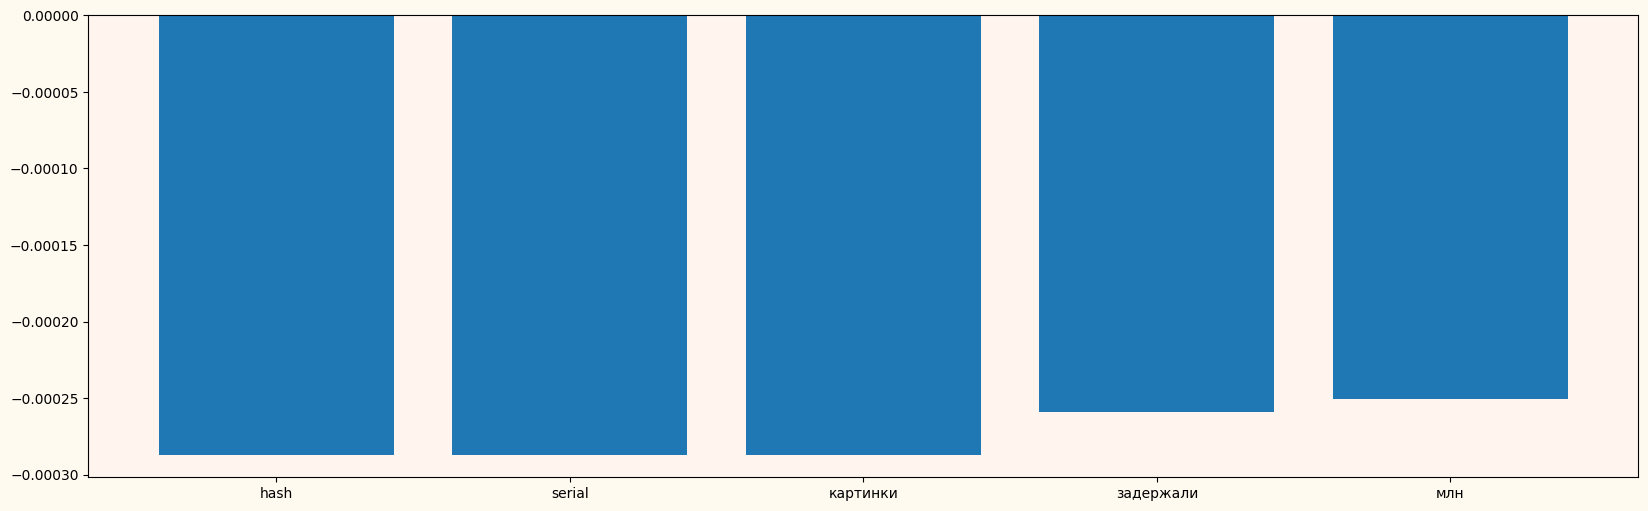

In [22]:
# Токены/хеши с самым большим отрицательным влиянием
sorted_dicts = {}
sorted_keys = sorted(dicts, key=dicts.get, reverse=False)
for w in sorted_keys:
    sorted_dicts[w] = dicts[w]
final_dict = {}
i = 0
for key, value in sorted_dicts.items():
    if i > len( sorted_dicts.items())//2 - 9 and i < len( sorted_dicts.items())//2 + 9: 
        final_dict[key] = value 
    elif i > len( sorted_dicts.items()) + 9:
        break
    i += 1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = []
for k in final_dict.keys():
    if len(k) > 14:
        x.append("hash")
    else:
        x.append(k)
y = final_dict.values()

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.show()

In [23]:
# Дистанция между двумя векторами
def distance(vec1, vec2):
    dist = np.sqrt(np.sum(np.square(vec1 - vec2)))
    return dist

In [24]:
# Получение результата - 1 или 0
def get_result(df, x, y):
    result = 0
    minimum = 1000000000
    for i in range(len(df)):
        dist = distance(df.iloc[i], x)
        if dist < minimum:
            
            minimum = dist
            result = y.iloc[i]
    return result

In [25]:
# Подсчёт совпадений
right = 0
count = len(x_test)
for i in range(count):
    if get_result(x_train, x_test.iloc[i], y_train) == y_test.iloc[i]:
        right += 1
        
print("{}%".format(right/count*100))
print("{}/{}".format(right, count))

55.00000000000001%
11/20
